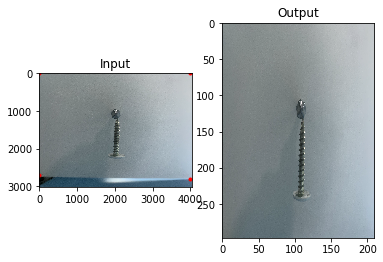

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("whatever.jpg")

blur = cv2.blur(img,(5,10))

rows,cols,ch = img.shape

point=[[0,0],[4000,0],[0, 2700],[4000,2800]]

pts1 = np.float32(point)
pts2 = np.float32([[0,0],[210,0],[0,297],[210,297]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(210,297))

plt.subplot(121),plt.imshow(img),plt.title('Input')

plt.plot(*zip(*point), marker='.', color='r', ls='')

plt.subplot(122),plt.imshow(dst),plt.title('Output')

plt.show()

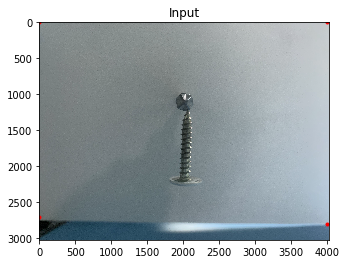

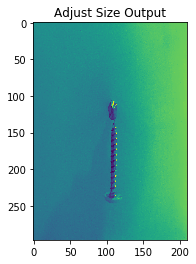

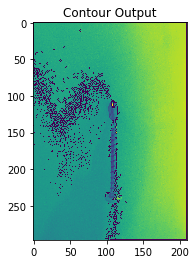

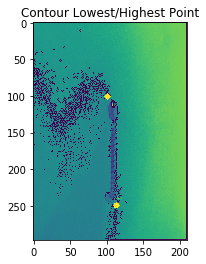

148.48568954616468


In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

img = cv2.imread("whatever.jpg")

imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

point=[[0,0],[4000,0],[0, 2700],[4000,2800]]

pts1 = np.float32(point)
pts2 = np.float32([[0,0],[210,0],[0,297],[210,297]])

#######

plt.figure(1)
plt.subplot(111),plt.imshow(img),plt.title('Input')
plt.plot(*zip(*point), marker='.', color='r', ls='')

#########

plt.figure(2)
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(imgray,M,(210,297))
plt.subplot(111),plt.imshow(dst),plt.title('Adjust Size Output')

#########

plt.figure(3);
ret,thresh = cv2.threshold(dst,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
rows,cols,ch = img.shape
contourImg = cv2.drawContours(dst, contours, -1, (0,255,0), 1)
plt.subplot(111)
plt.imshow(contourImg)
plt.title('Contour Output')

#########

plt.figure(4);

newContour = [];
for c in contours:
    if is_contour_good(c):
        newContour.append(c)
        
#print(newContour)

newContourImg = cv2.drawContours(dst, newContour, -1, (0,255,0), 1)

h_x,h_y = highestPoint(newContour);
l_x,l_y = lowestPoint(newContour);

#print('newContour is ', newContour)
#print('highest :', (h_x,h_y), 'lowest : ', (l_x,l_y))

lowestContourImg = cv2.circle(newContourImg, (l_x,l_y), 1, (255,255,255), thickness=5, lineType=8, shift=0)
highestContourImg = cv2.circle(lowestContourImg, (h_x,h_y), 1, (255,255,255), thickness=5, lineType=8, shift=0)
plt.subplot(111),plt.imshow(highestContourImg),plt.title('Contour Lowest/Highest Point')

plt.show()

print(math.sqrt((l_y  - h_y)**2+(l_x  - h_x)**2))

In [26]:
def highestPoint(contours):
    temp_y = 999
    temp_x = 0;
    for index, i in enumerate(contours):
        if index == 0:
            continue
        for j in i:
            x,y = j[0]
            if y < temp_y and x > 100 and y > 100:
                temp_y = y
                temp_x = x

    return temp_x, temp_y

def lowestPoint(contours):
    temp_y = 0
    temp_x = 0;
    for index, i in enumerate(contours):
        if index == 0:
            continue
        for j in i:
            x,y = j[0]
            if y > temp_y and x > 100 and y < 250 : 
            #if y > temp_y and x != 1:
                temp_y = y
                temp_x = x

    return temp_x, temp_y
    
def is_contour_good(c):
     peri = cv2.arcLength(c, True)
     approx = cv2.approxPolyDP(c, 0.02 * peri, True)
     return len(approx) > 4